In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
torch.cuda.is_available()

False

(640, 480)


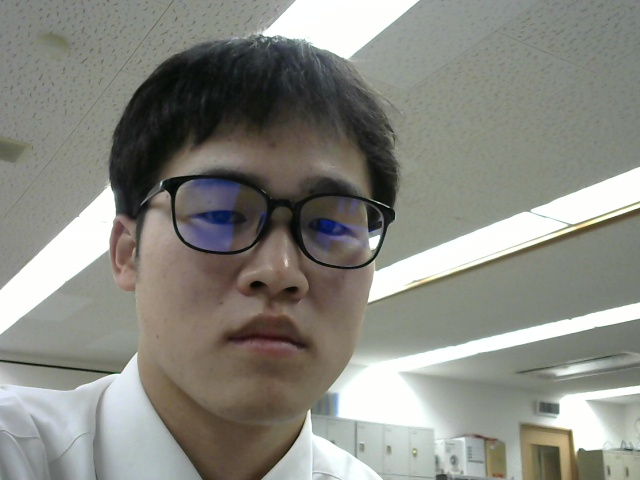

In [142]:
from PIL import Image

# img = Image.open("drive/MyDrive/Colab Notebooks/bobby.jpg")
# img = Image.open("drive/MyDrive/Colab Notebooks/scottish-fold.png").convert('RGB')
# img = Image.open("drive/MyDrive/Colab Notebooks/dell-00.jpg").convert('RGB')
img = Image.open("drive/MyDrive/Colab Notebooks/001.jpg").convert('RGB')
print(img.size)
img

In [ ]:
from torchvision import models
resnet = models.resnet101(pretrained=True)
resnet

**transforms.Compose**
* transforms.Resize(256)  
画像の短い辺を256ピクセルに変換する機能で、もう一方の辺は画像のアスペクト比を保持するピクセル数に変換される
* transforms.FiveCrop(size)  
左上、右上、左下、右下、中央をトリミング
* transforms.Pad(30, fill=0, padding_mode='constant')  
パディングを追加
* transforms.Lambda  
任意の関数をtransforms.Composeの中で処理できるようになる
* transforms.Normalize  
ここではImageNetで使用されている平均値と標準偏差を使用
* transforms.ToTensor  
画像データをチャンネル x 高さ x 幅の行列に変換する  
※多くの標準的なImageNetの事前学習済みモデル（例えば、ResNet、VGG、AlexNetなど）が224×224ピクセルの画像サイズで訓練されている

In [147]:
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
preprocess = transforms.Compose([
    transforms.Resize(256),
    # transforms.Grayscale(),
    transforms.CenterCrop(224),
    # transforms.FiveCrop(178),
    # transforms.Pad(30, fill=0, padding_mode='constant'),
    # transforms.RandomGrayscale(0.5),
    # transforms.RandomInvert(p=1),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
resnet.eval()

In [148]:
img_t = preprocess(img)
print(img_t)
# print(img_t.size)
print(type(img_t))
print(img_t.shape)
# img_t

tensor([[[ 0.1939,  0.2282,  0.2111,  ...,  0.1426,  0.2111,  0.1597],
         [ 0.1597,  0.2111,  0.1768,  ...,  0.1426,  0.1939,  0.1939],
         [ 0.0741,  0.1597,  0.1939,  ...,  0.1939,  0.2111,  0.1939],
         ...,
         [ 0.8618,  0.9474,  0.9646,  ...,  0.3309,  0.3823,  0.3309],
         [ 0.8276,  0.9132,  0.9474,  ...,  0.3652,  0.3994,  0.3309],
         [ 0.8276,  0.8961,  0.9646,  ...,  0.3823,  0.3823,  0.3309]],

        [[ 0.3803,  0.4153,  0.3978,  ...,  0.3627,  0.4328,  0.4328],
         [ 0.3452,  0.3978,  0.3627,  ...,  0.3978,  0.4678,  0.4328],
         [ 0.2577,  0.3452,  0.3803,  ...,  0.4328,  0.4328,  0.3803],
         ...,
         [ 1.2031,  1.2731,  1.3081,  ...,  0.2752,  0.2577,  0.2052],
         [ 1.1681,  1.2556,  1.3081,  ...,  0.3102,  0.2927,  0.2577],
         [ 1.0980,  1.2031,  1.2906,  ...,  0.3277,  0.3102,  0.2927]],

        [[ 0.4439,  0.4614,  0.4439,  ...,  0.4788,  0.5311,  0.5834],
         [ 0.4265,  0.4962,  0.4614,  ...,  0

第一次元に次元を追加

In [ ]:
batch_t = torch.unsqueeze(img_t, 0)
print( batch_t)
print(type(batch_t))
print(batch_t.shape)

In [ ]:
out = resnet(batch_t)
# print(out)
print(type(out))
print(out.shape)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/imagenet_classes.txt') as f:
  labels = [label.strip() for label in f.readlines()]
print(labels)
print(len(labels))

**torch.max(out, 1)**  
1はtensorの第2次元目を指定している(**tensorは0が第1次元を意味する**)  
* 1次元テンソル（ベクトル）: 形状が [n] のテンソルは、n 個の要素を持つベクトルです。ここで、第0次元はベクトルの長さ、つまり要素の数を表します。

* 2次元テンソル（行列）: 形状が [m, n] のテンソルは、m 行 n 列の行列です。第0次元は行の数を、第1次元は列の数を表します。

* 3次元テンソル: 形状が [p, m, n] のテンソルは、p 枚の m x n 行列を持つ3次元配列です。ここで、第0次元はこの配列に含まれる行列の数を表します。

In [ ]:
val, index = torch.max(out, 1)
print(val)
print(type(val))
print(index)
print(type(index))
print(index.shape)

tensor型.item()で要素をintやfloat型として扱うことが出来る  
##softmax
* out パラメータはベクトル
* dim パラメータは softmax を適用する次元を指定
ディープラーニング、特に分類問題において広く使われる関数です。この関数の主な目的は、入力された数値のベクトルを正規化し、それらの合計が1になるようにすることです。これにより、ベクトルの各要素は0から1の範囲の値を取り、**確率分布として解釈できるようになります。**  
ニューラルネットワークがクラスに属する確率を出力する場合、最終層の活性化関数として softmax を使用することが多い

In [152]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
labels[index[0]], percentage[index[0]].item()

('lab coat, laboratory coat', 38.32673645019531)

# 上位５クラスを表示する過程

 ## 上位５クラスのインデックスを取得
 * torch.sort(out, descending=True)  
 降順にソート

In [ ]:
val, index = torch.sort(out, descending=True)
# print(val)
# for v in val[0]:
#   print(v.item())
top_five_index = index[0, :5]
print(top_five_index)

tensor([527, 782, 664, 754, 673])


## 上位５クラスの名前と信頼度を表示

In [ ]:
[(labels[index], percentage[index]) for index in top_five_index]


[('desktop computer', tensor(70.0524, grad_fn=<SelectBackward0>)),
 ('screen, CRT screen', tensor(10.6032, grad_fn=<SelectBackward0>)),
 ('monitor', tensor(8.4939, grad_fn=<SelectBackward0>)),
 ('radio, wireless', tensor(5.7274, grad_fn=<SelectBackward0>)),
 ('mouse, computer mouse', tensor(1.1496, grad_fn=<SelectBackward0>))]